# Transformation of Features

Why Transformation of Features Are Required?

    Linear Regression---Gradient Descent ----Global Minima
    Algorithms like KNN,K Means,Hierarichal Clustering--- Eucledian Distance

Every Point has some vectors and Directiom

Deep Learning Techniques(Standardization, Scaling) 1.ANN--->GLobal Minima, Gradient 2.CNN 3.RNN

0-255 pixels
Types Of Transformation

    Normalization And Standardization
    Scaling to Minimum And Maximum values
    Scaling To Median And Quantiles
    Guassian Transformation Logarithmic Transformation Reciprocal Trnasformation Square Root Transformation Exponential Trnasformation Box Cox Transformation

Standardization

We try to bring all the variables or features to a similar scale. standarisation means centering the variable at zero. z=(x-x_mean)/std


# PROBLEM WITH STANDARD NORMAL DISTRUBUTION USE STANDARD SCALER

AFTER FEATURE ENGINEERING WE TRY TO SCALE DOWN THE VALUES
WE USE standardisation maximum in machine learning models

In [37]:
import pandas as pd

In [38]:
from sklearn.preprocessing import StandardScaler


In [131]:
df=pd.read_csv('titanic_train.csv',usecols=['fare','age','pclass'])
df.head()

,pclass,age,fare
0,3,NaN,7.7333
1,3,38.0,8.6625
2,3,30.0,24.1500
3,2,54.0,23.0000
4,2,40.0,13.0000


In [132]:
df['age'].fillna(df.age.median(),inplace=True)

In [133]:
for i in df.columns:
    print(i,':',df[i].isnull().sum())

pclass : 0
age : 0
fare : 1


In [134]:
df['fare'].dropna(inplace=True)

In [135]:
scaler=StandardScaler()     # HERE WE USE FIT_TRANSFORM BECAUSE WE NEED TO CHANGE OR TRANSFORM ORELSE WE USE JUST FIT TO TRAIN THE MACHINE LEARNING MODELS
dk=pd.DataFrame(scaler.fit_transform(df),columns=df.columns)
dk.head()

,pclass,age,fare
0,0.811420,-0.093041,-0.489610
1,0.811420,0.676701,-0.472298
2,0.811420,0.060908,-0.183751
3,-0.381845,1.908287,-0.205177
4,-0.381845,0.830649,-0.391486


In [136]:
import matplotlib.pyplot as plt

<AxesSubplot:>

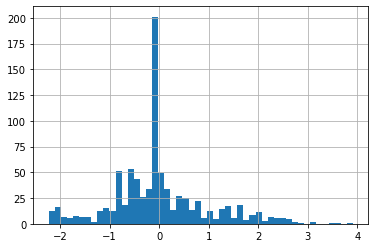

In [137]:
dk['age'].hist(bins=50) # WE WILL HAVE MANY VALUES AT MEDIAN BECAUSE WE REPLACED NAN VALUES WITH MEDIAN

<AxesSubplot:>

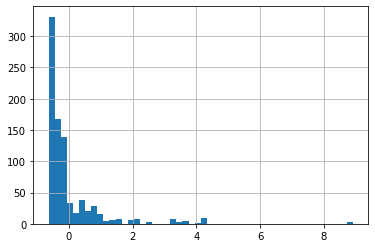

In [138]:
dk['fare'].hist(bins=50) # RIGHT SKEWED

<AxesSubplot:>

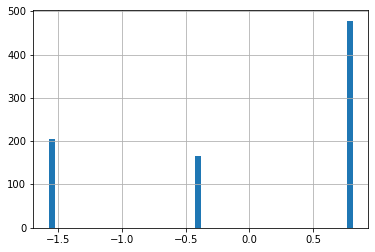

In [139]:
dk['pclass'].hist(bins=50) # DISCRETE VALUES not continuous

# NORMALISATION

In [140]:
from sklearn.preprocessing import MinMaxScaler

In [141]:
minmax=MinMaxScaler()
dm=pd.DataFrame(minmax.fit_transform(df),columns=df.columns)

In [142]:
dm.head()

,pclass,age,fare
0,1.0,0.348643,0.015094
1,1.0,0.473904,0.016908
2,1.0,0.373695,0.047138
3,0.5,0.674321,0.044893
4,0.5,0.498956,0.025374


<AxesSubplot:>

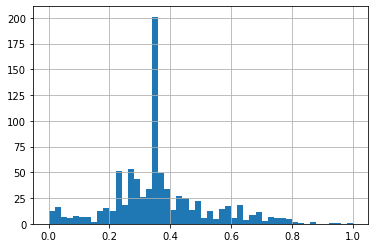

In [143]:
dm['age'].hist(bins=50)

<AxesSubplot:>

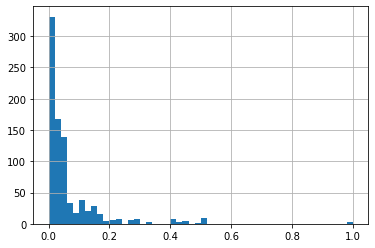

In [144]:
dm['fare'].hist(bins=50)

WE use normalisation maximum in deep learniong modules
Min Max Scaling (### CNN)---Deep Learning Techniques

Min Max Scaling scales the values between 0 to 1. X_scaled = (X - X.min / (X.max - X.min)


In [162]:
dd=pd.read_csv('titanic_train.csv',usecols=['fare','age'])

In [163]:
dd.head()

,age,fare
0,NaN,7.7333
1,38.0,8.6625
2,30.0,24.1500
3,54.0,23.0000
4,40.0,13.0000


In [164]:
dd['fare'].isnull().sum()

1

In [165]:
dd.fare.dropna(inplace=True)
dd.age.dropna(inplace=True) 

In [177]:
dd.isnull().sum()

age     174
fare      1
dtype: int64

 values no dropping because we are not changing in data frame

# Robust Scaler

It is used to scale the feature to median and quantiles Scaling using median and quantiles consists of substracting the median to all the observations, and then dividing by the interquantile difference. The interquantile difference is the difference between the 75th and 25th quantile:

IQR = 75th quantile - 25th quantile

X_scaled = (X - X.median) / IQR

0,1,2,3,4,5,6,7,8,9,10

9-90 percentile---90% of all values in this group is less than 9 1-10 precentile---10% of all values in this group is less than 1 4-40%


In [114]:
from sklearn.preprocessing import RobustScaler

In [115]:
robust=RobustScaler()     # HERE WE USE FIT_TRANSFORM BECAUSE WE NEED TO CHANGE OR TRANSFORM ORELSE WE USE JUST FIT TO TRAIN THE MACHINE LEARNING MODELS
dk=pd.DataFrame(robust.fit_transform(df),columns=df.columns)
dk.head()

,pclass,age,fare
0,0.0,0.000000,-0.275924
1,0.0,0.776699,-0.235706
2,0.0,0.155340,0.434627
3,-1.0,2.019417,0.384852
4,-1.0,0.932039,-0.047970


<AxesSubplot:>

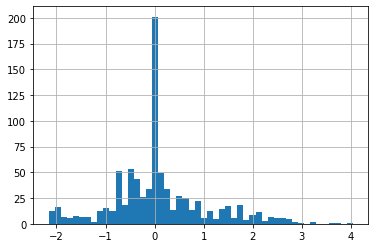

In [116]:
dk['age'].hist(bins=50)

<AxesSubplot:>

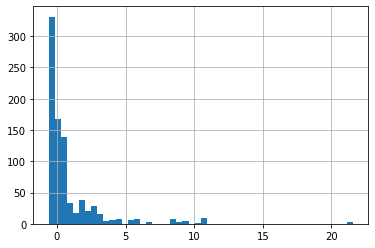

In [117]:
dk['fare'].hist(bins=50)

<AxesSubplot:>

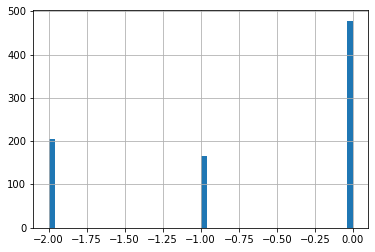

In [118]:
dk['pclass'].hist(bins=50)

# Guassian Transformation

Some machine learning algorithms like linear and logistic assume that the features are normally distributed -Accuracy -Performance

    logarithmic transformation
    reciprocal transformation
    square root transformation
    exponential transformation (more general, you can use any exponent)

In [209]:
#IF WE WANT TO CHECK WHETHER A FEATURE IS GUASSIAN OR NOT WE USE Q-Q PLOT

In [210]:
df=pd.read_csv('titanic_train.csv',usecols=['age','survived','fare'])
df.head()

,age,fare,survived
0,NaN,7.7333,1
1,38.0,8.6625,0
2,30.0,24.1500,0
3,54.0,23.0000,1
4,40.0,13.0000,0


In [211]:
### fillnan
df['age']=df['age'].fillna(df['age'].median())

In [212]:
df.isnull().sum()

age         0
fare        1
survived    0
dtype: int64

In [215]:
import scipy.stats as stat
import pylab

In [218]:
def plot_data(df,feature):
    plt.figure(figsize=(10,6))
    plt.subplot(1,2,1)
    df[feature].hist()
    plt.subplot(1,2,2)
    stat.probplot(df[feature],dist='norm',plot=pylab)
    plt.show()

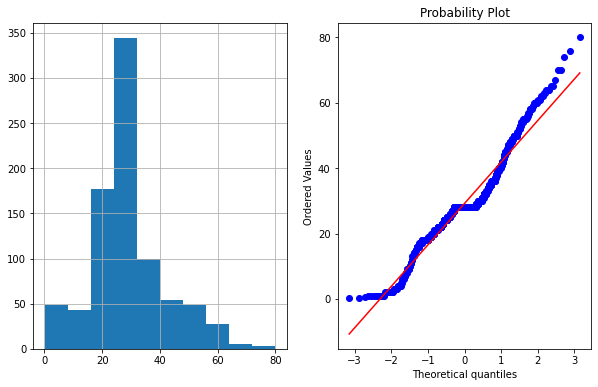

In [219]:
plot_data(df,'age')

# Logarithmic Transformation
#This is well used when it is right skewed or left skewed

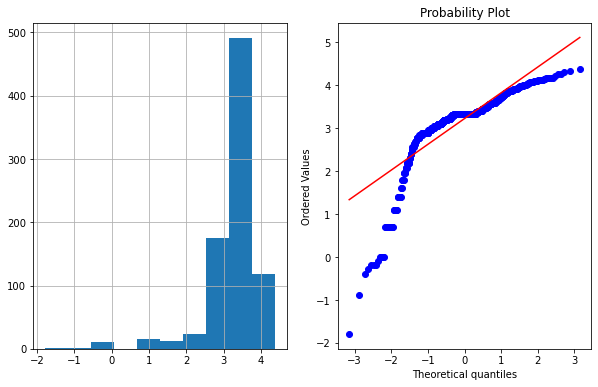

In [223]:
 import numpy as np
df['Age_log']=np.log(df['age'])
plot_data(df,'Age_log')

# reciprocal transformation

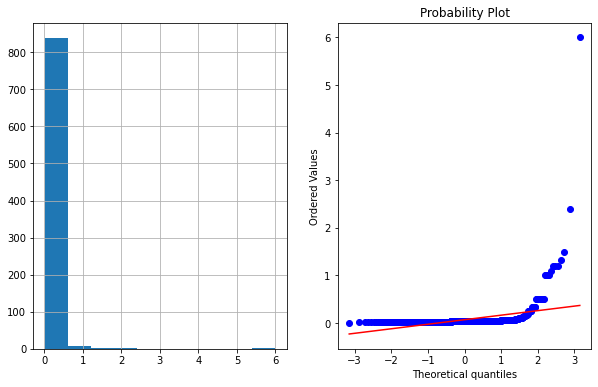

In [221]:
df['Age_rec']=1/(df['age'])
plot_data(df,'Age_rec')

# square root transformation


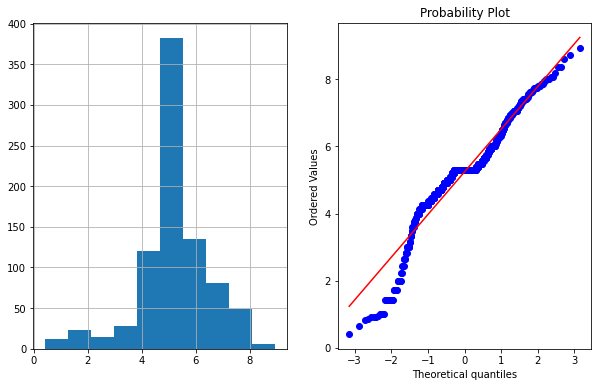

In [226]:
df['Age_sqroot']=df.age**(1/2)
plot_data(df,'Age_sqroot')

# exponential transformation (more general, you can use any exponent)

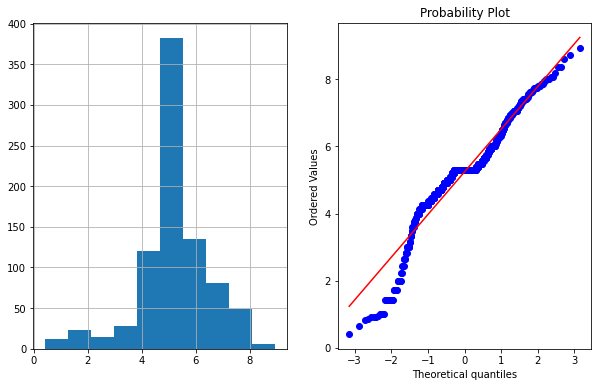

In [225]:
df['Age_exponential']=df.age**(1/2)
plot_data(df,'Age_exponential')            # 1/1.2 IS EXP VALUE